# Data Pre-processing

In [4]:
import pandas as pd
data=pd.read_csv("CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [5]:
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
data['MINIMUM_PAYMENTS'].fillna(data['MINIMUM_PAYMENTS'].mean(),inplace=True)
data.dropna(axis=0,how='any',thresh=None ,inplace=True)

In [7]:
import numpy as np
data['CUST_ID']=data.apply(lambda x : x['CUST_ID'][1:] , axis=1)
data['CUST_ID']=data['CUST_ID'].astype(np.int64)

# Agglomerative Clustering

In [8]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [9]:
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6
8947,19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [10]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative

,0
0,2
1,2
2,2
3,2
4,2
...,...
8944,2
8945,2
8946,2
8947,2


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'BALANCE')

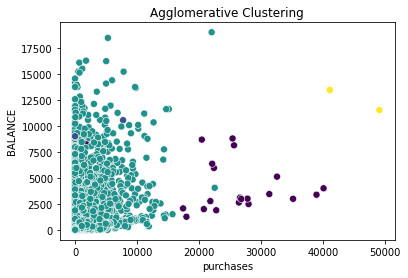

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
fig =plt.figure()
ax = fig.add_subplot(111)
sns.scatterplot( data['PURCHASES'],data ["BALANCE"] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("purchases")
ax.set_ylabel("BALANCE")

# Dendogram

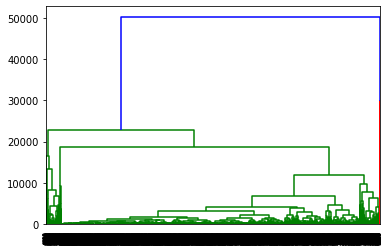

In [ ]:
import matplotlib.pyplot as plt

from scipy.cluster.hierarchy import dendrogram, linkage

dendrogram(linkage(data[['PURCHASES','BALANCE']], method='complete'),
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()

# K-Means clustering

In [12]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=4, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)

KMeans(n_clusters=4, random_state=0)

In [13]:
#labels
labels=pd.DataFrame(kmeans.labels_)
labels

,0
0,0
1,3
2,0
3,0
4,0
...,...
8944,2
8945,2
8946,2
8947,2


In [14]:
kmeans.predict(data)
print(kmeans.cluster_centers_) 

[[1.25830428e+04 1.13373764e+03 8.82896435e-01 8.03741570e+02
  4.63626369e+02 3.40176312e+02 5.36722124e+02 4.83529774e-01
  2.13165917e-01 3.42385949e-01 1.01781896e-01 2.08016751e+00
  1.29655998e+01 3.79636080e+03 1.26086401e+03 6.81056397e+02
  1.49990314e-01 1.16865091e+01]
 [1.24313437e+04 4.80832916e+03 9.09865391e-01 1.08432747e+04
  7.63260289e+03 3.21084367e+03 5.17149377e+03 7.52414758e-01
  5.97184484e-01 6.07702602e-01 2.25522508e-01 9.25000000e+00
  8.53437500e+01 1.24925781e+04 1.82647506e+04 2.49190560e+03
  3.39049227e-01 1.18359375e+01]
 [1.70959060e+04 7.48005885e+02 8.39523844e-01 5.41948739e+02
  2.55512885e+02 2.87063367e+02 5.52366383e+02 4.69600059e-01
  1.27338127e-01 3.69284858e-01 1.16093428e-01 2.57601713e+00
  1.00374732e+01 2.38570381e+03 9.30975482e+02 5.41279774e+02
  1.65781132e-01 1.12623126e+01]
 [1.32769150e+04 3.90466721e+03 9.45441846e-01 1.65276437e+03
  1.04525959e+03 6.07571343e+02 2.43447505e+03 5.28968120e-01
  3.14126149e-01 3.78693352e-01 2

In [18]:
data['label']=kmeans.labels_

In [19]:
kmeans.fit(data[["BALANCE","PURCHASES"]])

KMeans(n_clusters=4, random_state=0)

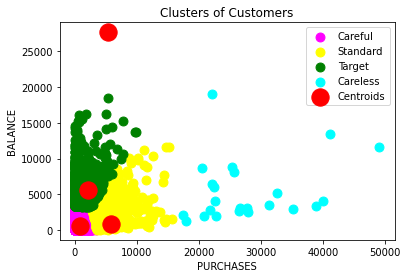

In [24]:
plt.scatter(data["PURCHASES"][kmeans.labels_ == 0],          
            data["BALANCE"][kmeans.labels_ == 0],s=80,c='magenta',label='Careful')
plt.scatter(data["PURCHASES"][kmeans.labels_ == 1],
           data["BALANCE"][kmeans.labels_ == 1],s=80,c='yellow',label='Standard')
plt.scatter(data["PURCHASES"][kmeans.labels_== 2],
           data["BALANCE"][kmeans.labels_ == 2],s=80,c='green',label='Target')
plt.scatter(data["PURCHASES"][kmeans.labels_ == 3], 
           data["BALANCE"][kmeans.labels_ == 3],s=80,c='cyan',label='Careless')
centers = np.array(kmeans.cluster_centers_)
plt.scatter(centers[:,0],centers[:,1],s=300, c='red', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('PURCHASES')
plt.ylabel('BALANCE')
plt.legend()
plt.show()

As seen above, the graph tell us that our data is divided into 4 clusters:
* careful category:people who have small amount of money in their account their purchases are less then 5000
* Standard category: purchases between 2500 and 15000 have a good amount of money left in their account between 0 and 12500. 
* target category: people having a lot of money in their account (2500 and 20000) they do little purchases(0 and 10000).
* careless people: they do a lot of purchases ,they spend between 18000 and 50000 their amount left in their account are between 0 and 20000

The graph resulted from K-means plot is more comprehensive and precise than hierarchical clustering.

# The Elbow method: k- value

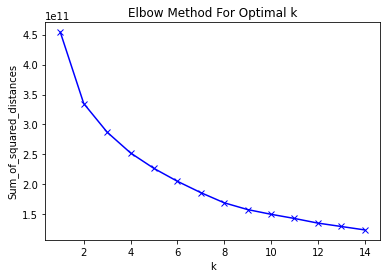

In [ ]:
Sum_of_squared_distances=[]
K= range(1,15)
for k in K:
  km= KMeans(n_clusters=k)
  km= km.fit(data.head(8900))
  Sum_of_squared_distances.append(km.inertia_)

#plotting
plt.plot(K, Sum_of_squared_distances,'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

the best K-value is 3 